## 数据归一化

数据归一化：将所有数据都映射到同一尺度上

 ***常用方法:***
* 最值归一化(Normalization)：把所有数据都映射到0～1之间 

    $x_{scale}=\dfrac {x-x_{\min }}{x_{\max }-x_{\min }}$

    适用于分布有明显边界的情况；受outlier(异常值)影响较大
    
    <br/>
* 0均值标准化(Z-score)：把所以数据归一到均值为0、标准差为1的分布中
    
    $ X_{scale}=\dfrac {x-\mu }{\sigma } $ （$\mu$为均值，$ \sigma $为标准差）
    
    $ \sigma= \sqrt {\dfrac {1}{n}\sum ^{n}_{i=1}\left( x_{i}-\mu\right) ^{2}} $
    
    适用于分布没有明显边界的情况；

### 最值归一化 Normalization

In [1]:
import numpy as np

In [2]:
x=np.random.randint(0,100,size=100)

In [3]:
x

array([61, 34, 30, 88, 11, 86, 84, 36, 33, 34, 11,  9, 78, 44,  9, 40,  1,
       42, 17, 41, 30, 53, 17, 99, 83, 10,  0, 44, 67, 66, 90, 88, 21, 25,
       23, 98, 46, 17, 38, 78, 42,  2, 40, 94, 56, 25, 81, 90, 86, 20, 18,
       28, 79, 67,  0, 96,  6, 61, 88, 99, 53, 74, 31, 52,  0, 25,  4, 71,
       86, 23, 77, 38, 82, 71, 91, 29, 88, 43, 66, 50, 55, 49, 76, 57, 60,
       39, 99, 73,  7, 90, 51, 19,  8, 29,  9, 81, 15, 49, 44, 92])

In [4]:
(x - np.min(x))/(np.max(x)-np.min(x))

array([0.61616162, 0.34343434, 0.3030303 , 0.88888889, 0.11111111,
       0.86868687, 0.84848485, 0.36363636, 0.33333333, 0.34343434,
       0.11111111, 0.09090909, 0.78787879, 0.44444444, 0.09090909,
       0.4040404 , 0.01010101, 0.42424242, 0.17171717, 0.41414141,
       0.3030303 , 0.53535354, 0.17171717, 1.        , 0.83838384,
       0.1010101 , 0.        , 0.44444444, 0.67676768, 0.66666667,
       0.90909091, 0.88888889, 0.21212121, 0.25252525, 0.23232323,
       0.98989899, 0.46464646, 0.17171717, 0.38383838, 0.78787879,
       0.42424242, 0.02020202, 0.4040404 , 0.94949495, 0.56565657,
       0.25252525, 0.81818182, 0.90909091, 0.86868687, 0.2020202 ,
       0.18181818, 0.28282828, 0.7979798 , 0.67676768, 0.        ,
       0.96969697, 0.06060606, 0.61616162, 0.88888889, 1.        ,
       0.53535354, 0.74747475, 0.31313131, 0.52525253, 0.        ,
       0.25252525, 0.04040404, 0.71717172, 0.86868687, 0.23232323,
       0.77777778, 0.38383838, 0.82828283, 0.71717172, 0.91919

##### 矩阵归一化

In [5]:
X=np.random.randint(0,100,(50,2))

In [6]:
X = np.array(X,dtype=float)

In [7]:
for i in range(0,X.ndim):
    X[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i])-np.min(X[:,i]))

In [8]:
X[:10,:]

array([[0.16842105, 0.95698925],
       [0.        , 0.67741935],
       [0.64210526, 0.61290323],
       [0.92631579, 0.2688172 ],
       [1.        , 0.52688172],
       [0.8       , 0.89247312],
       [0.93684211, 0.        ],
       [0.43157895, 0.47311828],
       [0.89473684, 0.84946237],
       [0.2       , 0.50537634]])

In [9]:
import matplotlib.pyplot as plt

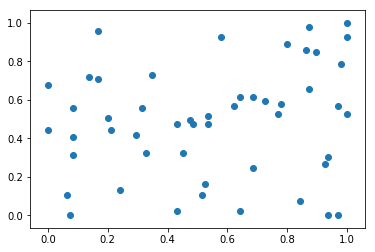

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
# 均值
np.mean(X[:,0])

0.543578947368421

In [12]:
# 标准差
np.std(X[:,0])

0.3199983379458222

### 0均值标准化 Z-score

In [13]:
X2 = np.random.randint(0,100,(50,2))
X2=np.array(X,dtype=float)

In [14]:
for i in range(0,X2.ndim):
    X2[:,i] = (X2[:,i] - np.mean(X2[:,i])) / np.std(X2[:,i])

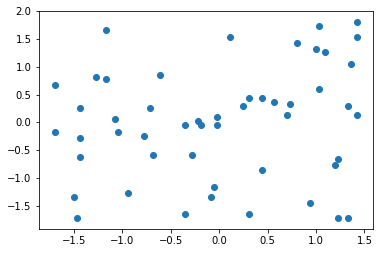

In [15]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [16]:
np.mean(X2[:,0])

4.4408920985006264e-17

In [17]:
np.std(X2[:,0])

1.0

In [18]:
np.mean(X2[:,1])

-2.0095036745715334e-16

In [19]:
np.std(X2[:,1])

1.0

### 对测试数据集进行归一化

***x_test = (x_test - mean_train) / mean_train***

我们需要保存 mean_train、mean_train

### scikit-learn中的 Scaler

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)

In [23]:
standardScaler = StandardScaler()

In [24]:
standardScaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [26]:
standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [27]:
x_train = standardScaler.transform(x_train)

In [28]:
x_test = standardScaler.transform(x_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [32]:
knn_clf.score(x_test,y_test)

1.0

###  更多有关k近邻算法：
**优点：**
* 解决分类问题

* 天然可以解决多分类问题

* 思想简单 效果强大

* 可以解决回归问题（预测具体的数值 股票价值 学生成绩分数）
    
    
**缺点：**
* 效率低下
如果训练集有m个样本 n个特征 则预测每一个新的数据 需要O(m * n)
优化，使用树结构：KD-Tree Ball-Tree

* 高度数据相关 就是使用高度数据相关 对outliner比较敏感 可以让数据变错误

* 预测结果不具有可解释性

* 维数灾难：随着维数增加 看似相近的两个点之间的距离越来越大 (过拟合）

    https://blog.csdn.net/ustbbsy/article/details/80961157
   